## STEP 1 :- IMPORT STANDARD PYTHON LIBRARIES

In [1]:
# Import Pyhton Libraries
import numpy as np
import pandas as pd

# Import Data Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt

# Import Filter Warning Library
import warnings
warnings.filterwarnings('ignore')

# Other Important Libraries
from collections import OrderedDict
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
import scipy.stats as sci

## STEP 2:- IMPORTING DATASET

In [2]:
df = pd.read_csv('PaperData.csv')
df.head()    # head() allows to visualize top five rows from the dataset

,Water,Cement,FA,NCA,RCA,SP,SRCA,DRCA,WRCA,Strength
0,165.0,370,650.0,850.5,364.5,2.22,20,2400,4.9,50.6
1,165.0,370,650.0,607.5,607.5,2.22,20,2400,4.9,50.8
2,165.0,370,650.0,0.0,1215.0,2.22,20,2400,4.9,50.2
3,165.0,460,575.0,850.5,364.5,2.22,20,2400,4.9,60.8
4,165.0,460,575.0,607.5,607.5,2.22,20,2400,4.9,61.2


In [3]:
df.info()   # .info() is used to check the null values in the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Water     344 non-null    float64
 1   Cement    344 non-null    int64  
 2   FA        344 non-null    float64
 3   NCA       344 non-null    float64
 4   RCA       344 non-null    float64
 5   SP        344 non-null    float64
 6   SRCA      344 non-null    int64  
 7   DRCA      344 non-null    int64  
 8   WRCA      344 non-null    float64
 9   Strength  344 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 27.0 KB


In [4]:
df.describe()   # describe() is used to check the distribution of the dataset w.r.t Mean Value.

,Water,Cement,FA,NCA,RCA,SP,SRCA,DRCA,WRCA,Strength
count,344.000000,344.000000,344.00000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,184.624099,386.863372,717.51936,398.072733,650.736047,1.324141,19.755814,2231.058140,4.804651,44.394767
std,25.835463,82.160062,128.32394,370.708697,377.733453,2.051261,4.020171,580.951629,2.262402,15.617672
min,117.600000,158.000000,123.53000,0.000000,52.000000,0.000000,10.000000,0.000000,0.000000,13.400000
25%,165.000000,340.000000,653.60000,0.000000,298.975000,0.000000,19.000000,2320.000000,3.700000,35.475000
50%,180.000000,380.000000,698.00000,471.000000,552.000000,0.000000,20.000000,2362.500000,4.900000,43.250000
75%,205.000000,413.000000,811.77750,733.500000,982.000000,2.590000,20.000000,2420.000000,5.800000,51.525000
max,271.000000,600.000000,1010.00000,1448.250000,1778.000000,7.800000,32.000000,2661.000000,10.900000,108.500000


## STEP 3:- EXPLORATORY DATA ANALYSIS [EDA]

In [5]:
df.columns   # Various Columns also known as Features Can be viewed using .columns command.

Index(['Water', 'Cement', 'FA', 'NCA', 'RCA', 'SP', 'SRCA', 'DRCA', 'WRCA',
       'Strength'],
      dtype='object')

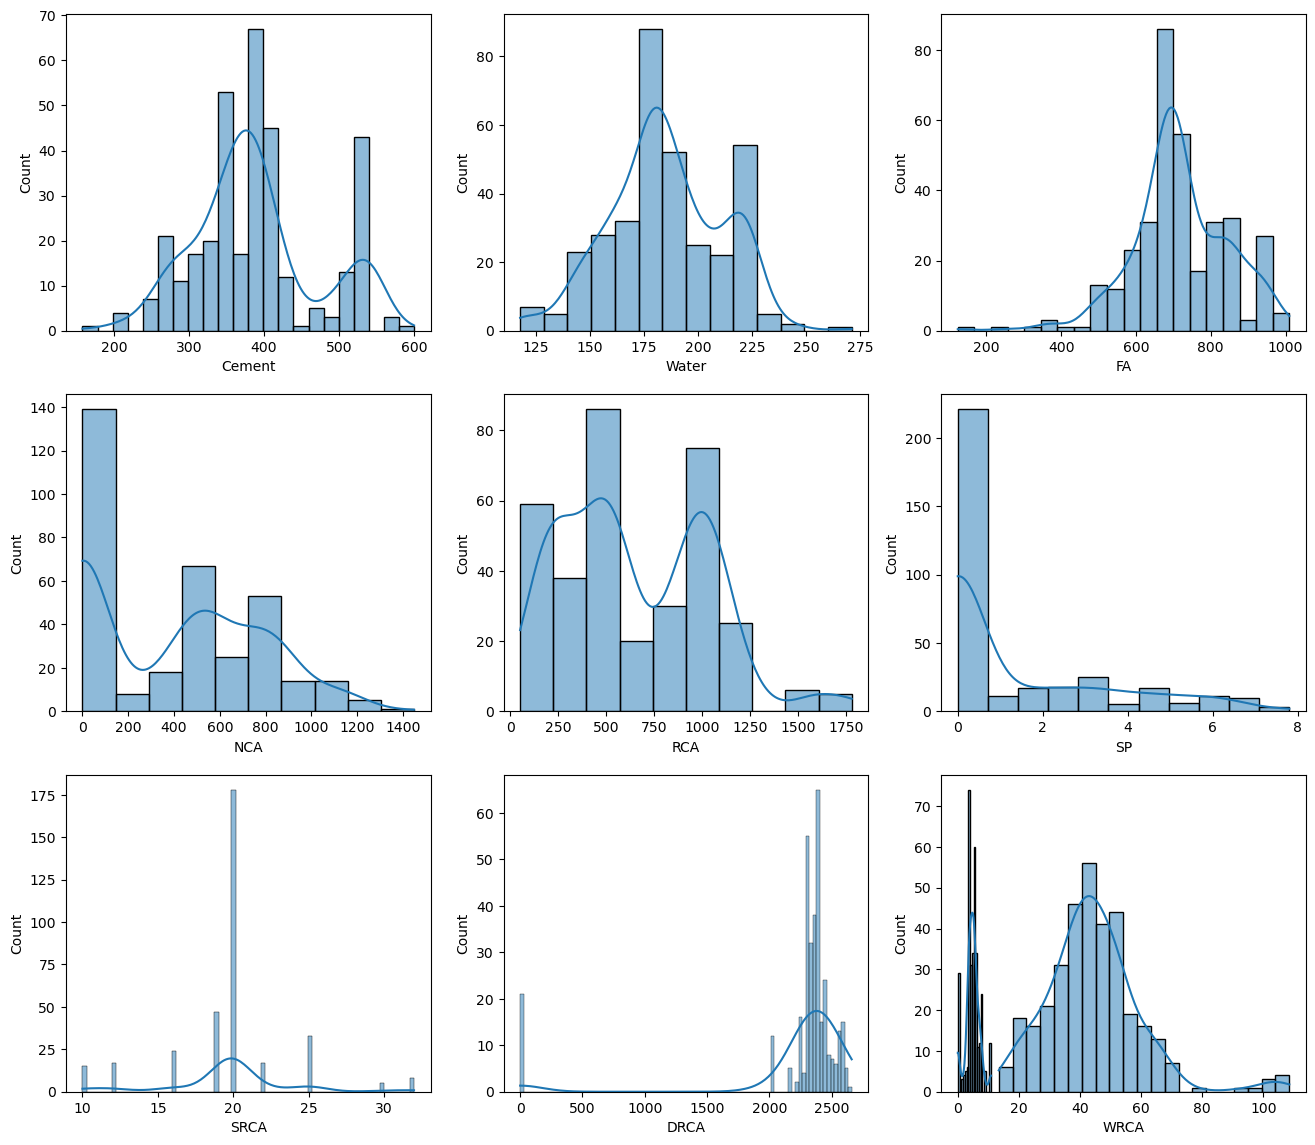

In [6]:
fig,axes = plt.subplots(3,3,figsize = (16,14),facecolor = 'white',)
sns.histplot(ax=axes[0][0],data = df.Cement,kde=True)
sns.histplot(ax=axes[0][1],data = df.Water,kde=True)
sns.histplot(ax=axes[0][2],data = df.FA,kde=True)
sns.histplot(ax=axes[1][0],data = df.NCA,kde=True)
sns.histplot(ax=axes[1][1],data = df.RCA,kde=True)
sns.histplot(ax=axes[1][2],data = df.SP,kde=True)
sns.histplot(ax=axes[2][0],data = df.SRCA,kde=True)
sns.histplot(ax=axes[2][1],data = df.DRCA,kde=True)
sns.histplot(ax=axes[2][2],data = df.WRCA,kde=True)
sns.histplot(df.Strength,kde=True)
plt.show()

In [7]:
def replace_outlier(my_df,col,method='Quartile',strategy='Median'):
    col_data=my_df[col] #method means how you are supposed to detect outliers
    
    if method=='Quartile':
        #using quartiles to calculate IQR
        q1=col_data.quantile(0.25)
        q2=col_data.quantile(0.5)
        q3=col_data.quantile(0.75)
        
        
        IQR=q3-q1
        LW=q1-(1.5*IQR)
        UW=q3+(1.5*IQR)
        
        
    elif method=='Standard Deviation':  #we are using emperical method here
        mean=col_data.mean()
        std=col_data.std()
        LW=mean-(2*std)
        UW=mean+(2*std)
    
    else:
        print('Pass the correct method')
    #now printing all the outliers
    
    
    outliers=my_df.loc[(col_data<LW) | (col_data>UW)]
    outliers_density= round(len(outliers)/len(my_df),2)
    if len(outliers)==0:
        print(f'Feature {col} does not have any outliers.')
        print('\n')
    else:
        print(f'Feature {col} has outliers.')
        print('\n')
        print(f'Total number of outliers in {col} are {len(outliers)} ')
        print('\n')
        print(f'Outlier percentage in {col} is {outliers_density}%')
        print('\n')
        display(my_df[(col_data < LW) | (col_data > UW)])
    
    #replacing outlier
    if strategy == 'Median':
        my_df.loc[(col_data < LW) | (col_data > UW),col] = q2
    
    elif strategy == 'Mean':
        my_df.loc[(col_data < LW) | (col_data > UW),col] = q3
    
    else:
        print('Pass a correct strategy')
    
    return my_df


In [8]:
def odt_plots(my_df,col):
    f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (25,8))
    
    #descriptive statistics box plot
    
    sns.boxplot(my_df[col],ax = ax1)
    ax1.set_title(col+'boxplot')
    ax1.set_xlabel('Values')
    ax1.set_ylabel('Boxplot')
    
    
    #plotting histogram with outliers
    sns.distplot(my_df[col],ax = ax2,fit = sci.norm)    #On histogram we are fitting normal distribution plot
    ax2.axvline(my_df[col].mean() , color = 'green')
    ax2.axvline(my_df[col].median() , color = 'brown')
    ax2.set_title(col + 'histogram with outliers')
    ax2.set_xlabel('Values')
    ax2.set_ylabel('Boxplot')
    
    #replacing outlier
    df_out = replace_outlier( my_df, col)
    
    
    #Plotting histogram without outliers
    sns.distplot(df_out[col],ax = ax3,fit = sci.norm)    #On histogram we are fitting normal distribution plot
    ax3.axvline(df_out[col].mean() , color = 'green')
    ax3.axvline(df_out[col].median() , color = 'brown')
    ax3.set_title(col + 'histogram without outliers')
    ax3.set_xlabel('Values')
    ax3.set_ylabel('Boxplot')
    plt.show()

Feature Water has outliers.


Total number of outliers in Water are 1 


Outlier percentage in Water is 0.0%




,Water,Cement,FA,NCA,RCA,SP,SRCA,DRCA,WRCA,Strength
30,271.0,353,625.0,0.0,959.0,0.0,20,2330,6.3,43.3


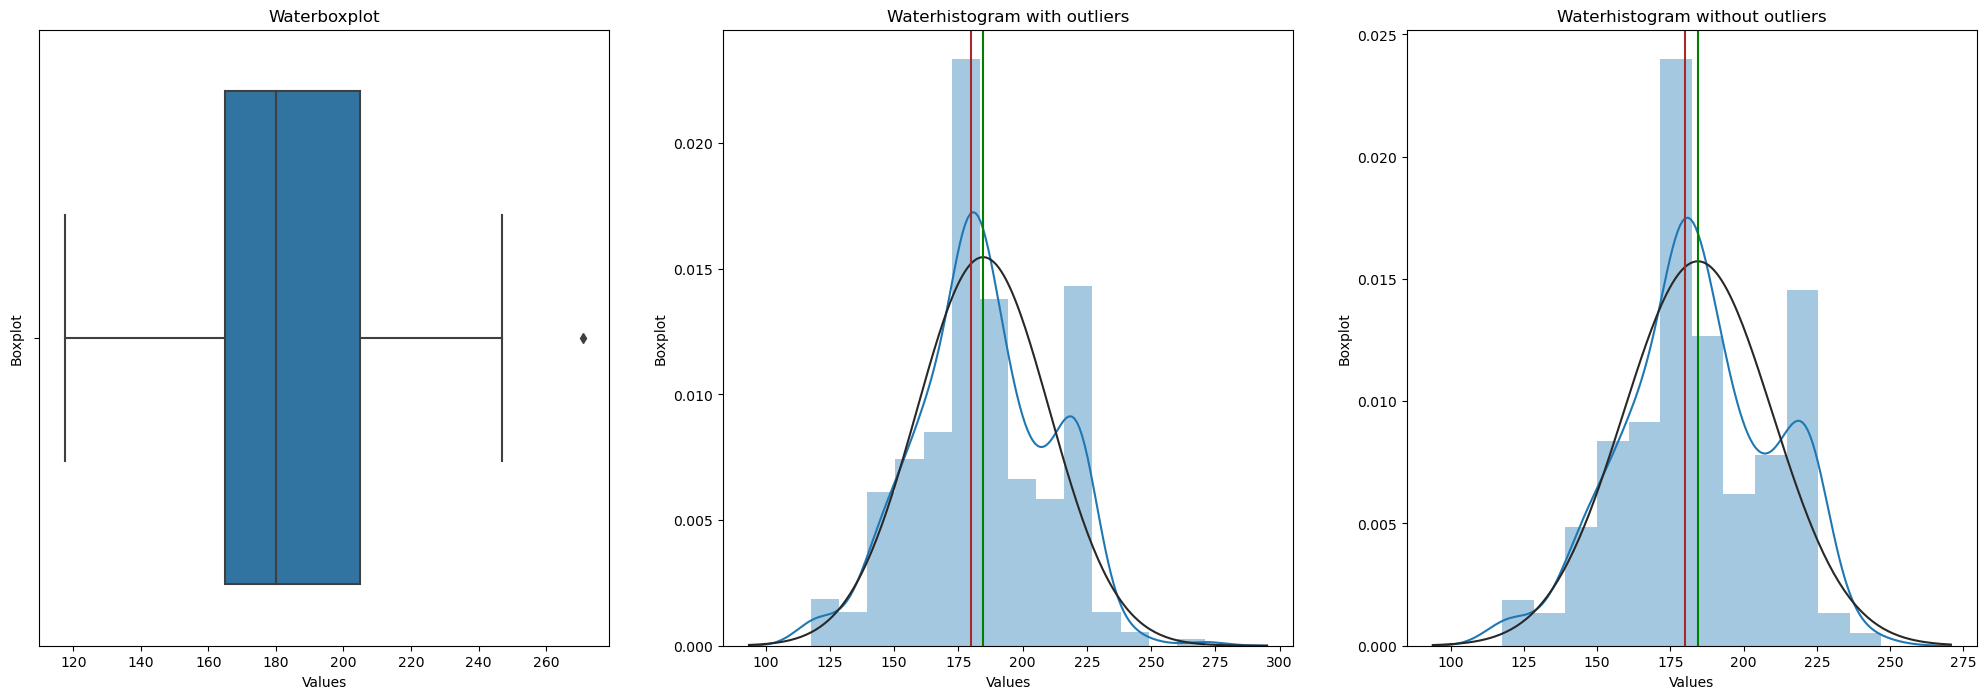

Feature Cement has outliers.


Total number of outliers in Cement are 49 


Outlier percentage in Cement is 0.14%




,Water,Cement,FA,NCA,RCA,SP,SRCA,DRCA,WRCA,Strength
6,165.0,560,495.0,850.5,364.5,2.59,20,2400,4.9,70.2
7,165.0,560,495.0,607.5,607.5,2.59,20,2400,4.9,70.8
8,165.0,560,495.0,0.0,1215.0,2.59,20,2400,4.9,70.0
153,199.0,158,681.0,1061.0,566.0,0.00,12,2010,10.9,38.6
167,180.0,600,567.0,0.0,879.0,5.04,10,2220,7.8,62.8
168,220.0,537,693.0,782.0,138.0,0.00,20,2330,4.4,50.8
169,220.0,537,693.0,644.0,276.0,0.00,20,2330,4.4,44.9
170,220.0,537,693.0,506.0,414.0,0.00,20,2330,4.4,44.6
171,220.0,537,693.0,368.0,552.0,0.00,20,2330,4.4,42.4
172,220.0,537,693.0,782.0,138.0,0.00,20,2370,4.0,54.0


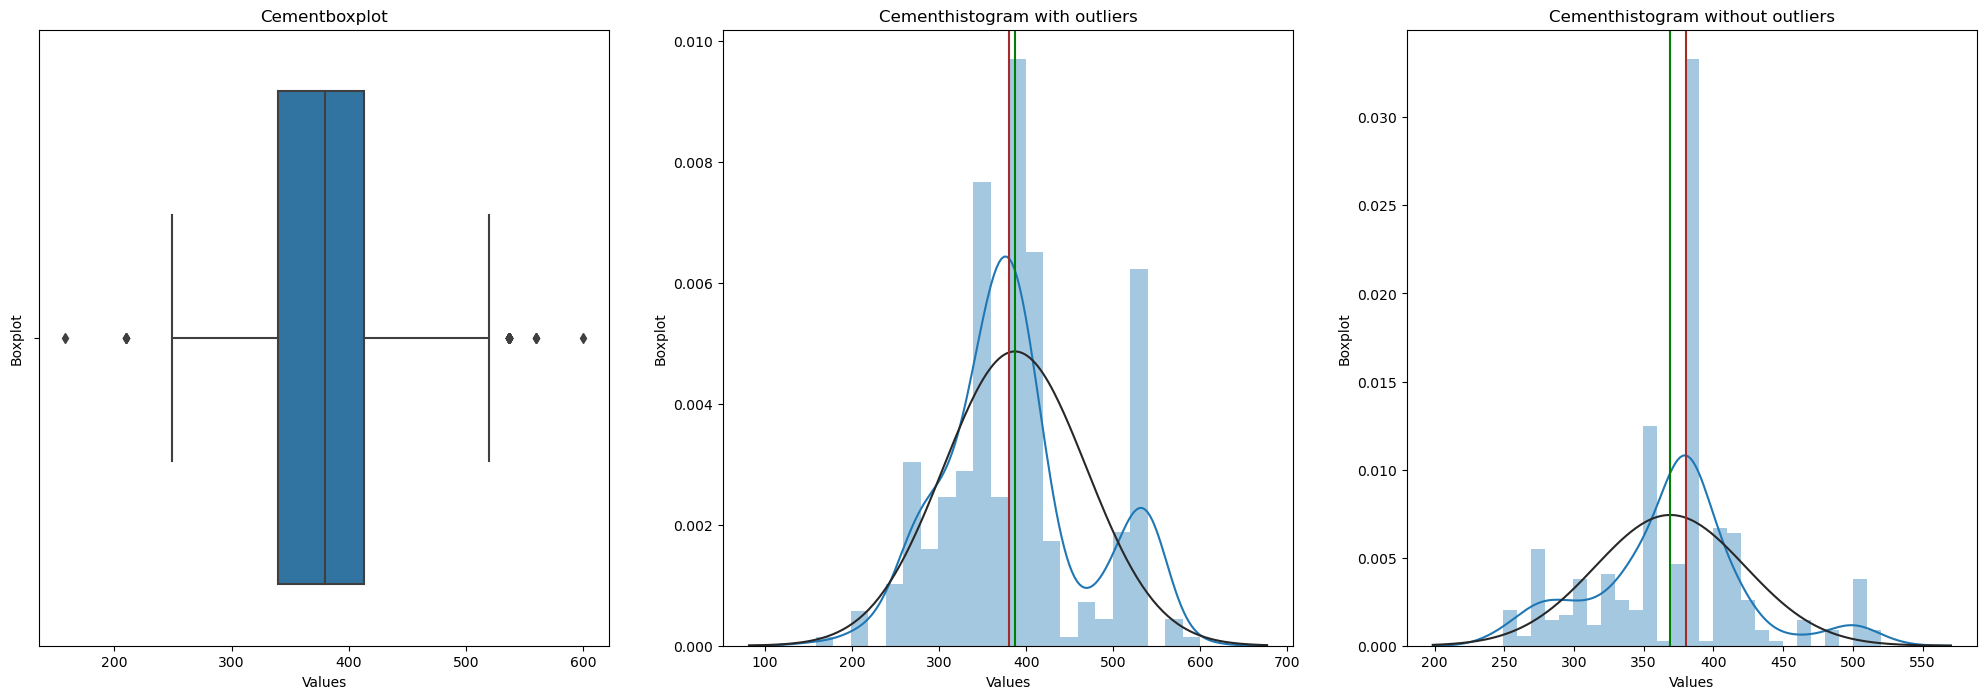

Feature FA has outliers.


Total number of outliers in FA are 7 


Outlier percentage in FA is 0.02%




,Water,Cement,FA,NCA,RCA,SP,SRCA,DRCA,WRCA,Strength
39,175.6,380,327.00,1162.00,254.00,4.9,20,2165,6.8,60.8
97,186.0,372,370.59,128.78,247.06,0.0,20,2630,0.0,25.9
98,186.0,372,247.06,128.78,370.59,0.0,20,2630,0.0,23.5
99,186.0,372,123.53,128.78,494.12,0.0,20,2630,0.0,15.4
152,196.0,350,368.00,1061.00,283.00,0.0,12,2010,10.9,37.6
156,168.0,350,381.00,1100.00,294.00,3.5,12,2010,10.9,47.8
160,143.0,350,395.00,1138.00,304.00,3.5,12,2010,10.9,63.2


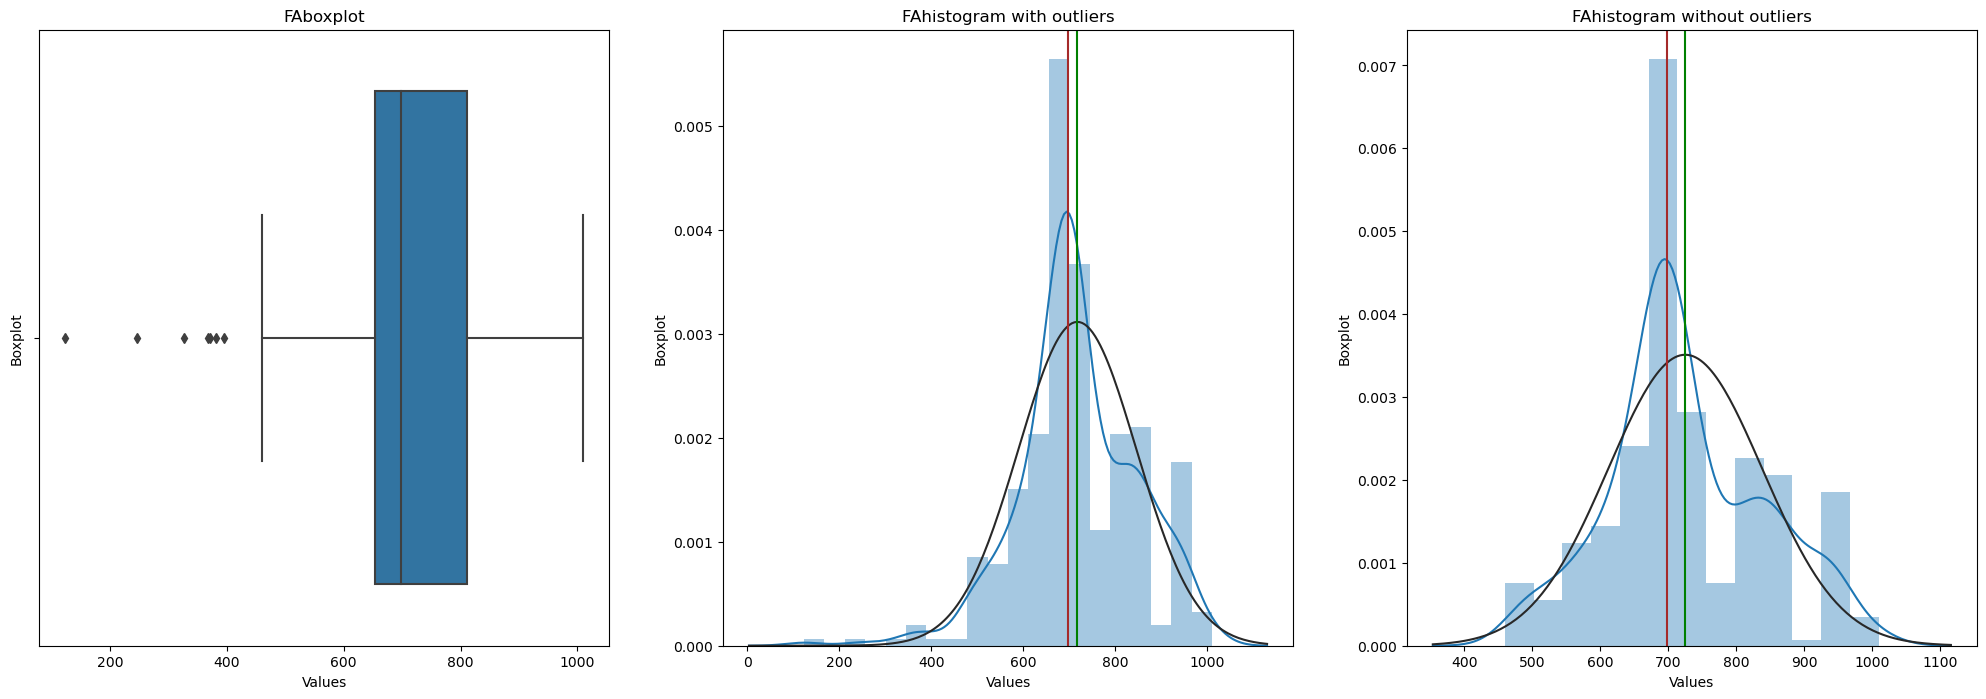

Feature NCA does not have any outliers.




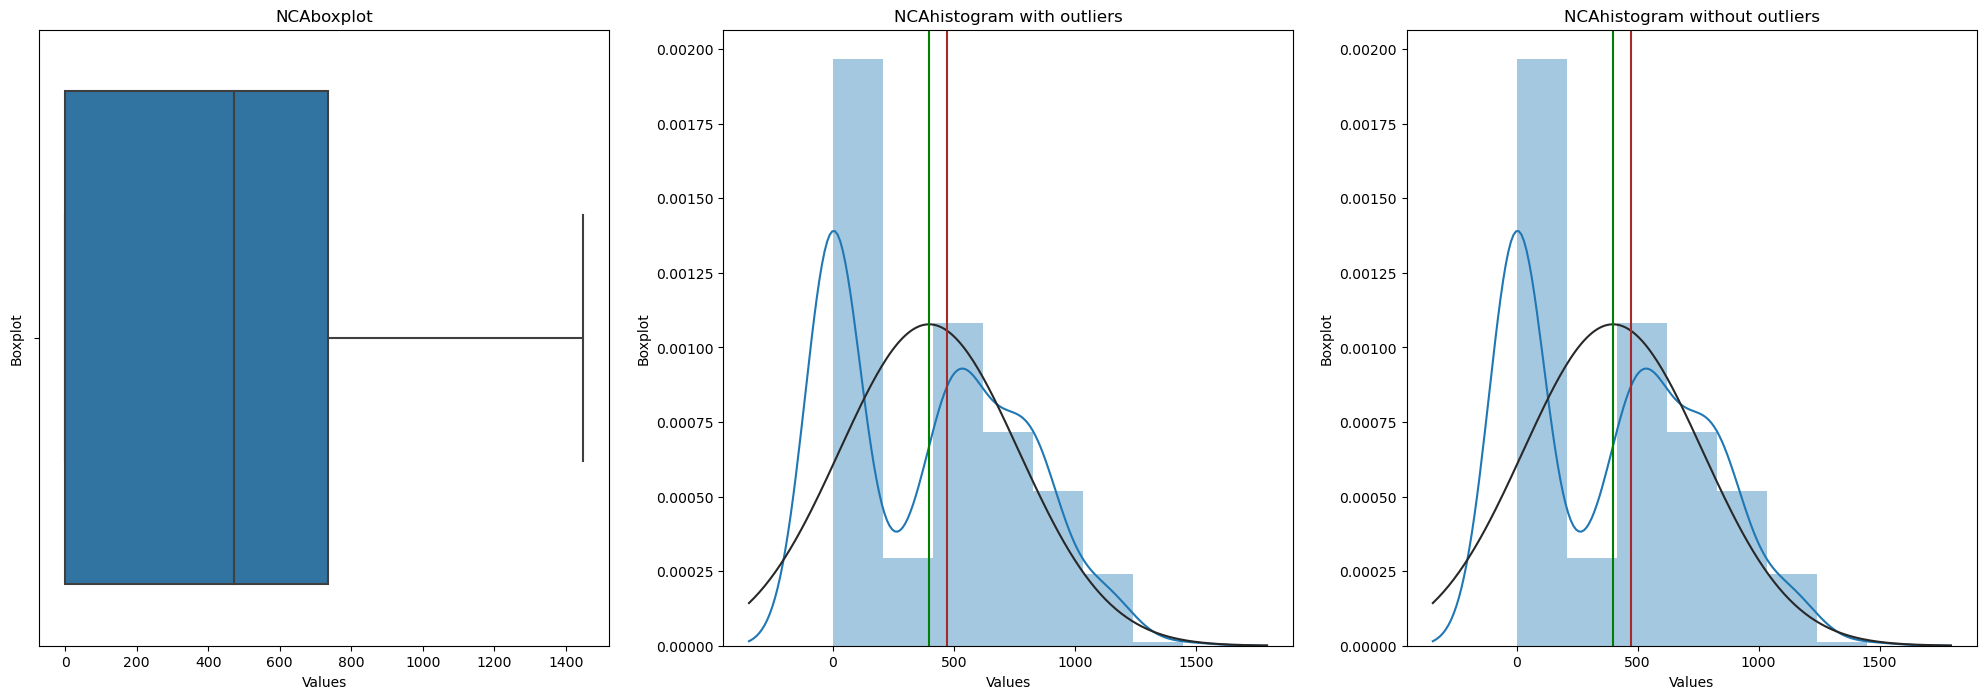

Feature RCA does not have any outliers.




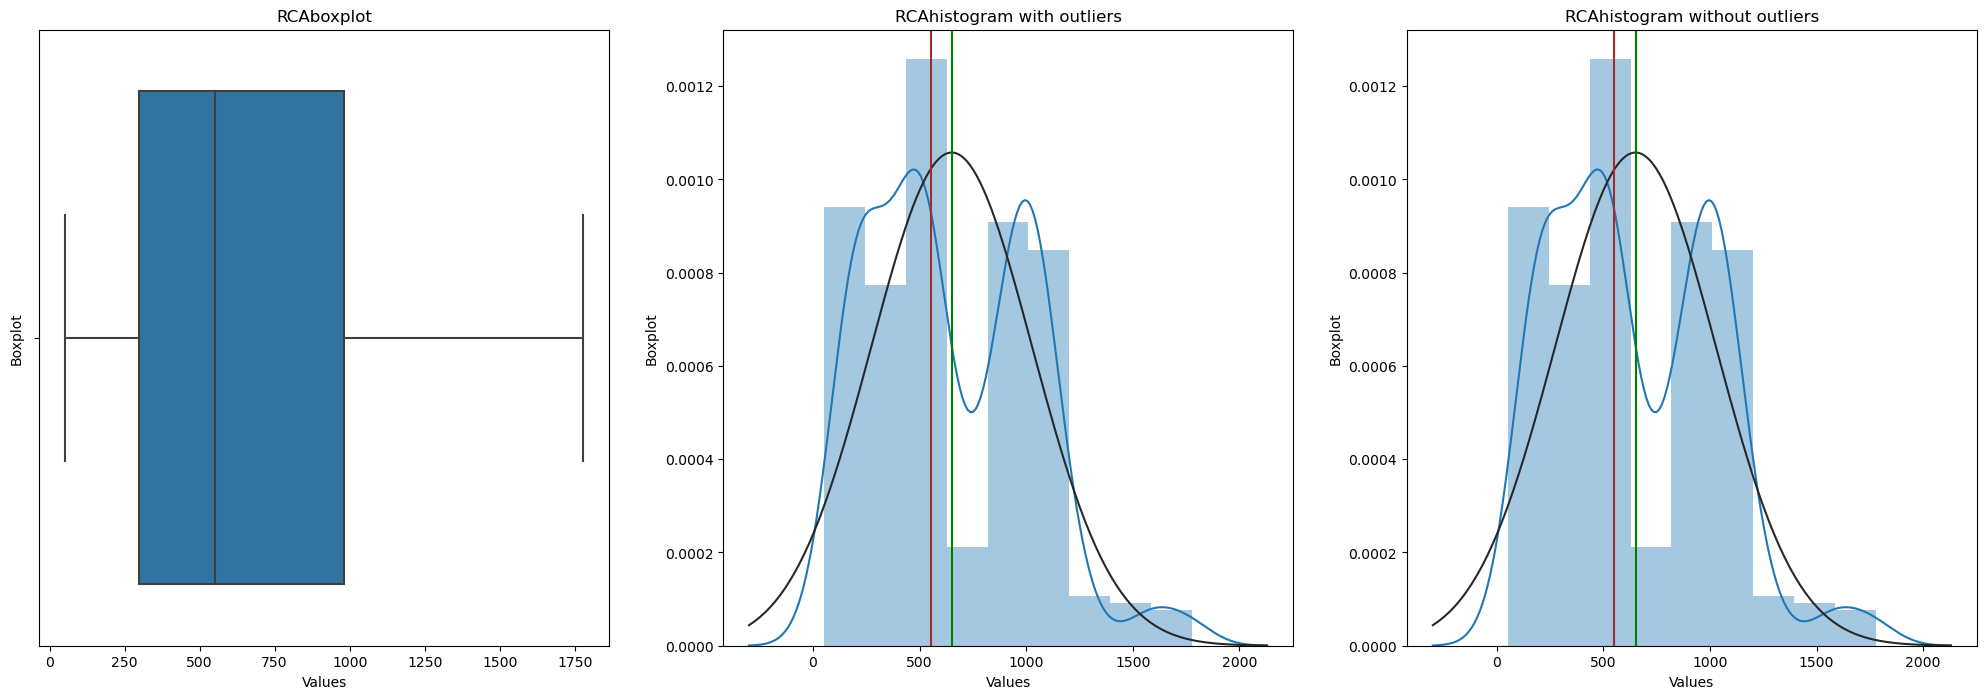

Feature SP has outliers.


Total number of outliers in SP are 3 


Outlier percentage in SP is 0.01%




,Water,Cement,FA,NCA,RCA,SP,SRCA,DRCA,WRCA,Strength
70,160.0,400,729.0,912.0,221.0,7.8,20,2580,3.5,69.6
71,160.0,400,729.0,570.0,554.0,7.8,20,2580,3.5,65.3
72,160.0,400,729.0,0.0,1107.0,7.8,20,2580,3.5,58.5


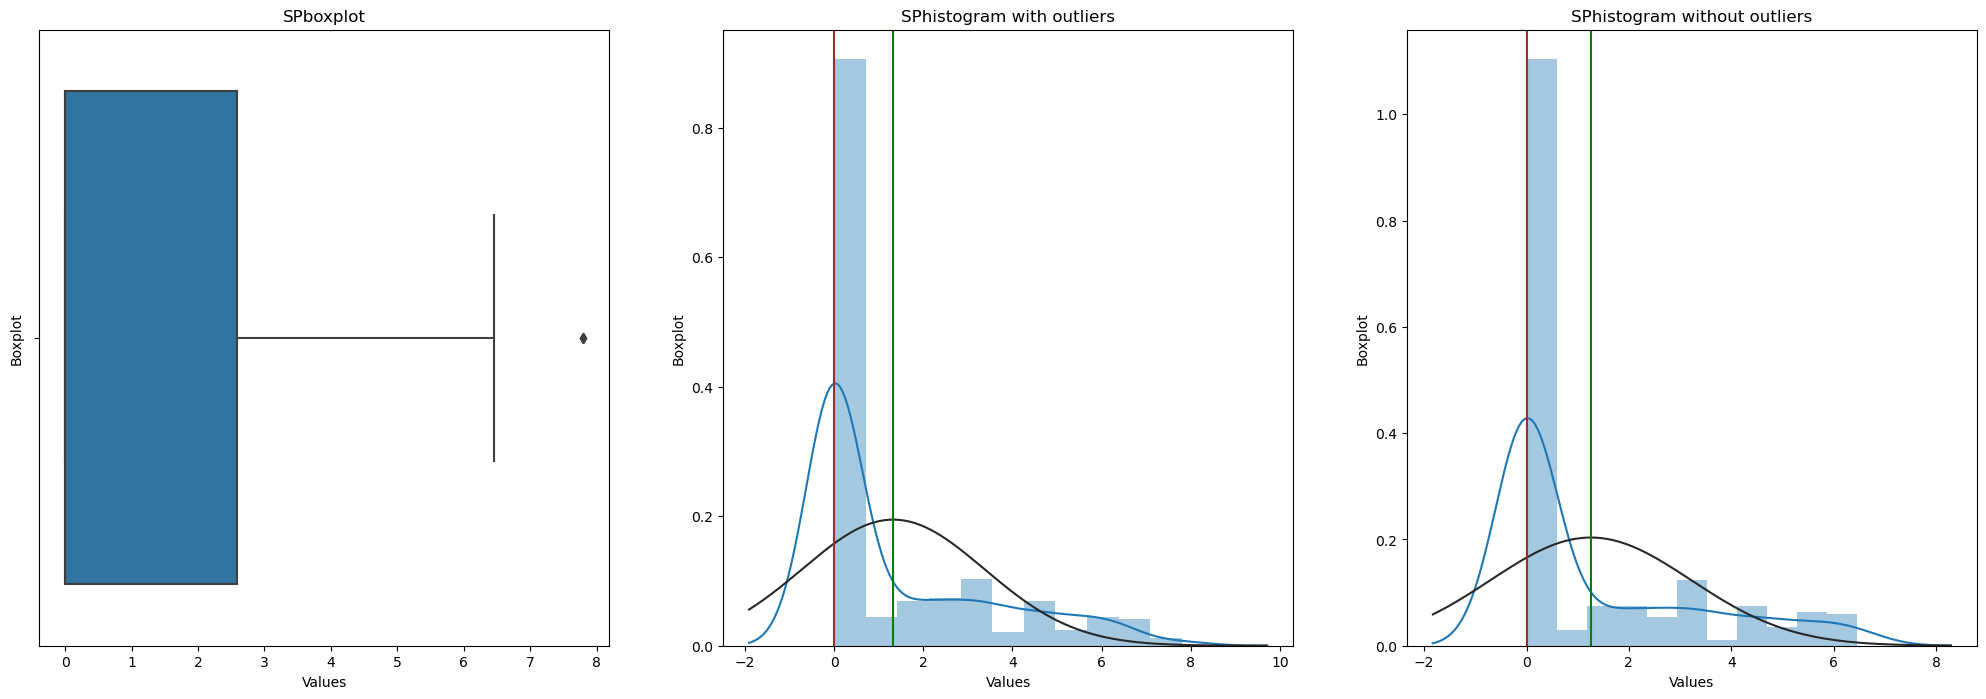

Feature SRCA has outliers.


Total number of outliers in SRCA are 119 


Outlier percentage in SRCA is 0.35%




,Water,Cement,FA,NCA,RCA,SP,SRCA,DRCA,WRCA,Strength
9,180.0,500,486.6,0.0,1135.4,0.0,16,0,0.0,44.5
10,180.0,500,681.0,0.0,1574.3,0.0,16,0,0.0,38.7
11,180.0,500,486.6,0.0,1135.4,0.0,16,0,0.0,46.1
12,180.0,500,681.0,0.0,1574.3,0.0,16,0,0.0,42.4
13,180.0,500,486.6,0.0,1135.4,0.0,16,0,0.0,52.5
...,...,...,...,...,...,...,...,...,...,...
321,187.6,280,877.0,0.0,988.0,0.0,22,2484,5.4,41.1
322,150.5,350,868.0,0.0,982.0,3.5,22,2363,3.6,70.2
323,205.8,380,943.0,0.0,977.0,0.0,22,2447,6.9,23.6
324,190.4,280,873.0,0.0,962.0,0.0,22,2458,5.8,39.7


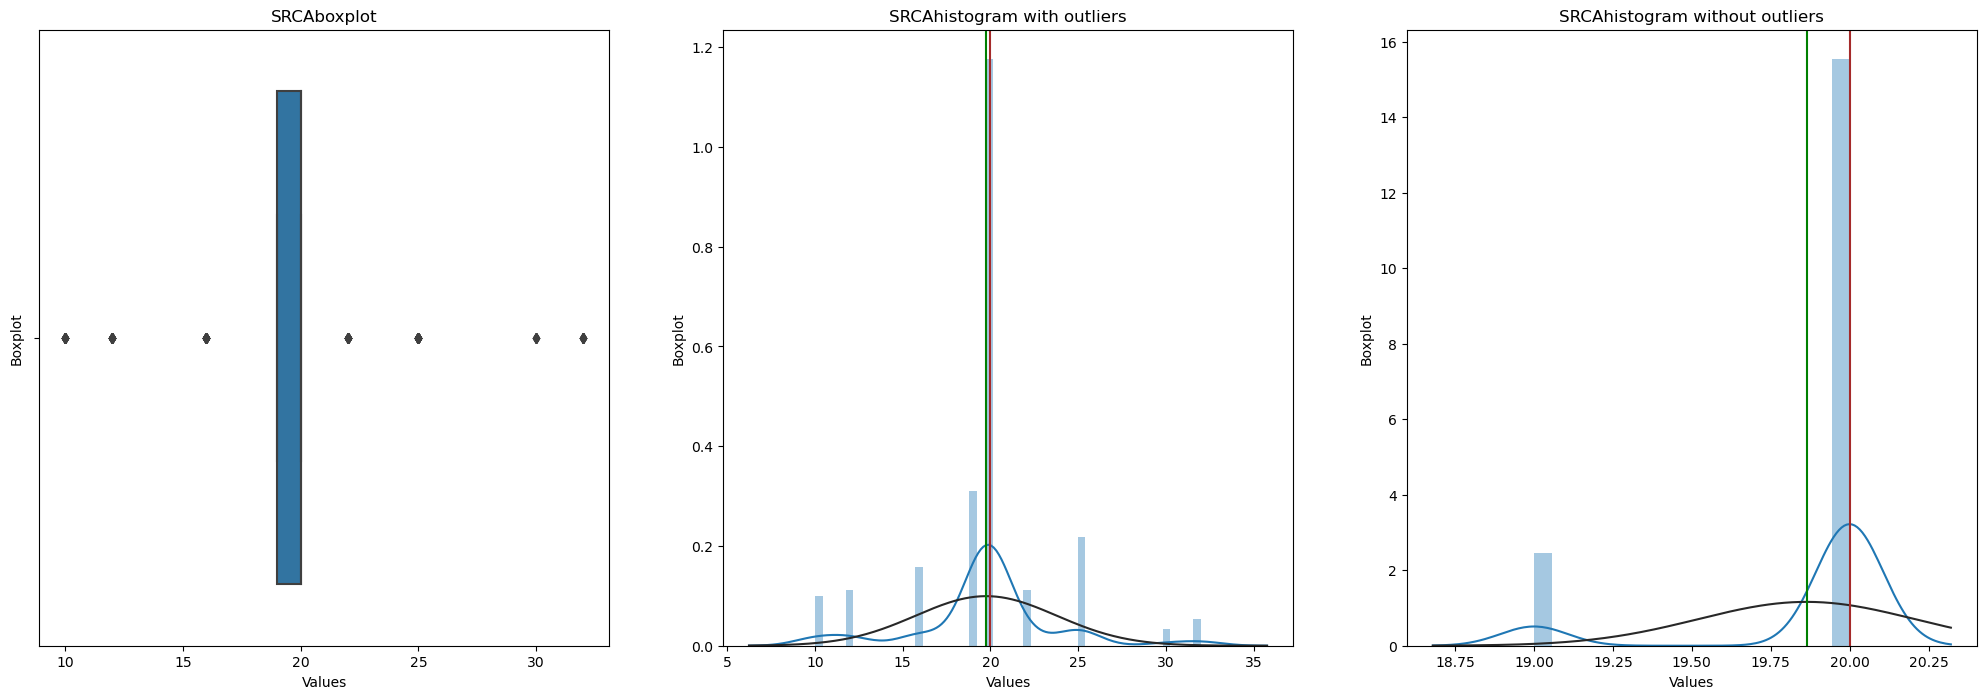

Feature DRCA has outliers.


Total number of outliers in DRCA are 59 


Outlier percentage in DRCA is 0.17%




,Water,Cement,FA,NCA,RCA,SP,SRCA,DRCA,WRCA,Strength
9,180.00,500,486.60,0.00,1135.40,0.00000,20,0,0.0,44.5
10,180.00,500,681.00,0.00,1574.30,0.00000,20,0,0.0,38.7
11,180.00,500,486.60,0.00,1135.40,0.00000,20,0,0.0,46.1
12,180.00,500,681.00,0.00,1574.30,0.00000,20,0,0.0,42.4
13,180.00,500,486.60,0.00,1135.40,0.00000,20,0,0.0,52.5
14,180.00,500,681.00,0.00,1574.30,0.00000,20,0,0.0,50.7
15,180.00,500,486.60,0.00,1135.40,0.00000,20,0,0.0,45.2
16,180.00,500,681.00,0.00,1574.30,0.00000,20,0,0.0,42.0
17,180.00,500,486.60,0.00,1135.40,0.00000,20,0,0.0,49.6
18,180.00,500,681.00,0.00,1574.30,0.00000,20,0,0.0,45.1


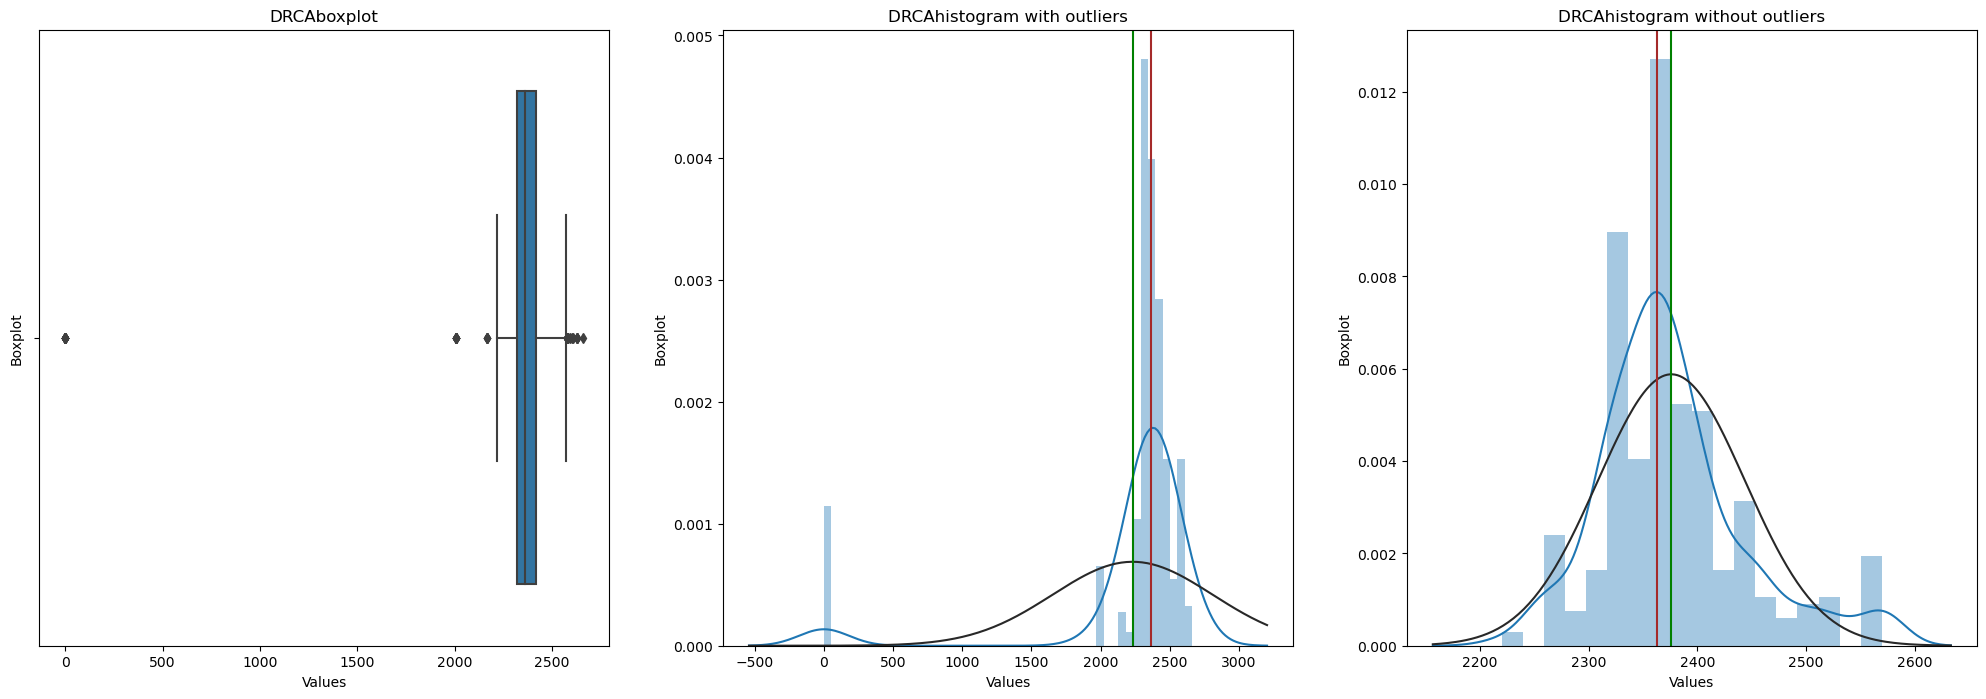

Feature WRCA has outliers.


Total number of outliers in WRCA are 41 


Outlier percentage in WRCA is 0.12%




,Water,Cement,FA,NCA,RCA,SP,SRCA,DRCA,WRCA,Strength
9,180.0,500,486.60,0.00,1135.40,0.000,20,2362.5,0.0,44.5
10,180.0,500,681.00,0.00,1574.30,0.000,20,2362.5,0.0,38.7
11,180.0,500,486.60,0.00,1135.40,0.000,20,2362.5,0.0,46.1
12,180.0,500,681.00,0.00,1574.30,0.000,20,2362.5,0.0,42.4
13,180.0,500,486.60,0.00,1135.40,0.000,20,2362.5,0.0,52.5
14,180.0,500,681.00,0.00,1574.30,0.000,20,2362.5,0.0,50.7
15,180.0,500,486.60,0.00,1135.40,0.000,20,2362.5,0.0,45.2
16,180.0,500,681.00,0.00,1574.30,0.000,20,2362.5,0.0,42.0
17,180.0,500,486.60,0.00,1135.40,0.000,20,2362.5,0.0,49.6
18,180.0,500,681.00,0.00,1574.30,0.000,20,2362.5,0.0,45.1


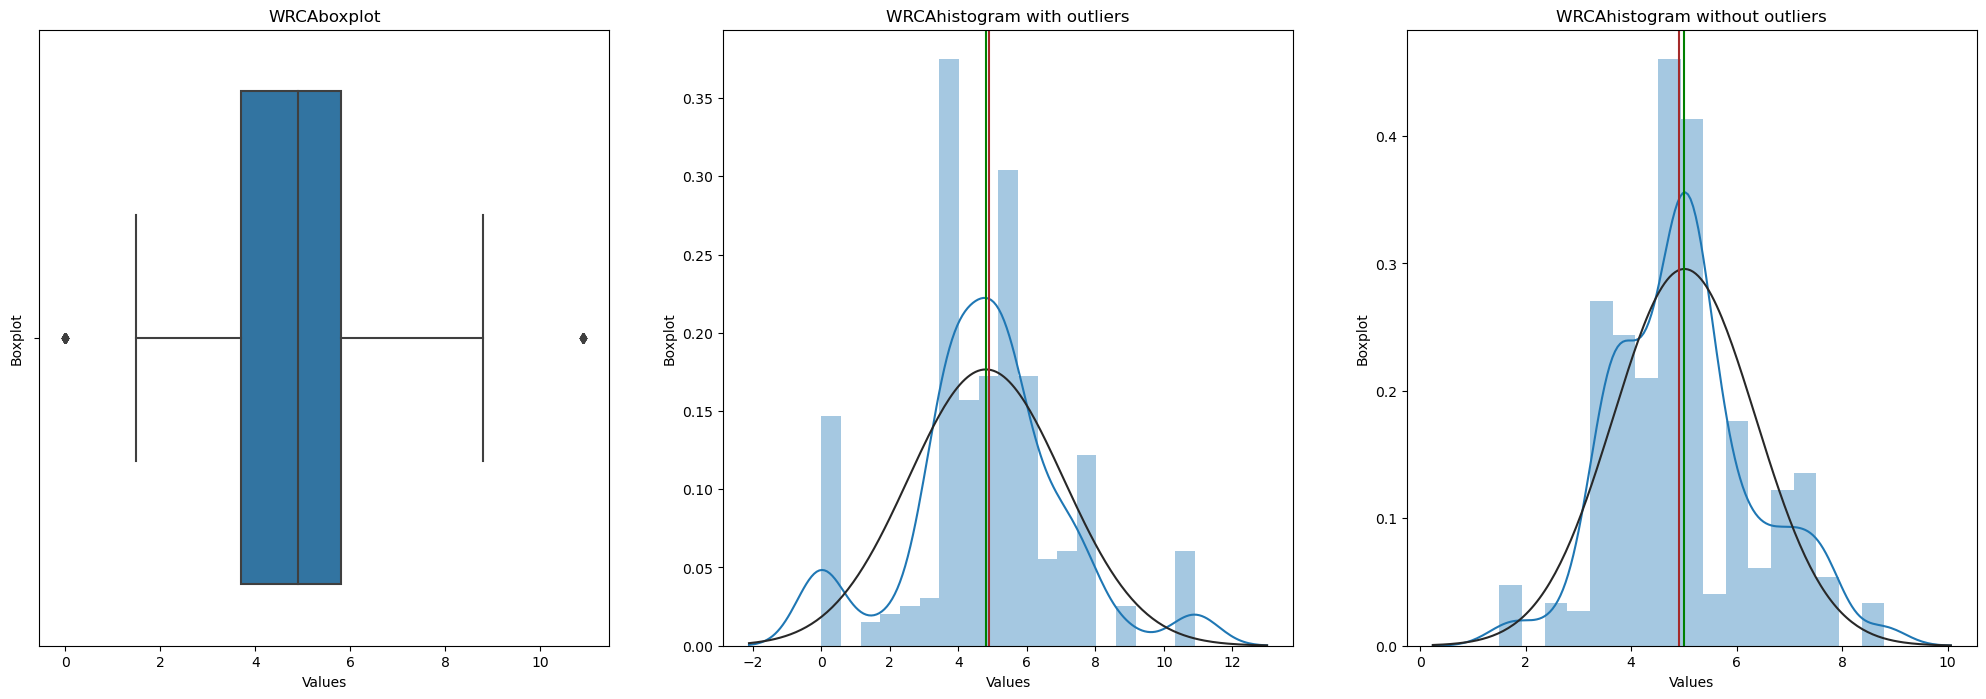

Feature Strength has outliers.


Total number of outliers in Strength are 10 


Outlier percentage in Strength is 0.03%




,Water,Cement,FA,NCA,RCA,SP,SRCA,DRCA,WRCA,Strength
278,137.1,380,927.0,869.2,202.0,0.0,20,2470.0,3.7,108.0
279,146.5,380,927.0,543.2,505.1,0.0,20,2470.0,3.7,104.8
280,162.3,380,927.0,0.0,1010.2,0.0,20,2470.0,3.7,108.5
281,138.2,380,927.0,869.2,195.0,0.0,20,2390.0,4.9,102.5
282,149.8,380,927.0,543.2,487.5,0.0,20,2390.0,4.9,103.1
283,170.4,380,927.0,0.0,975.1,0.0,20,2390.0,4.9,100.8
284,139.7,380,927.0,869.2,187.8,0.0,20,2300.0,5.9,104.3
285,153.1,380,927.0,543.4,469.4,0.0,20,2300.0,5.9,96.8
286,175.0,380,927.0,0.0,938.8,0.0,20,2300.0,5.9,91.2
302,165.0,485,685.0,0.0,1039.0,0.0,20,2450.0,3.1,78.2


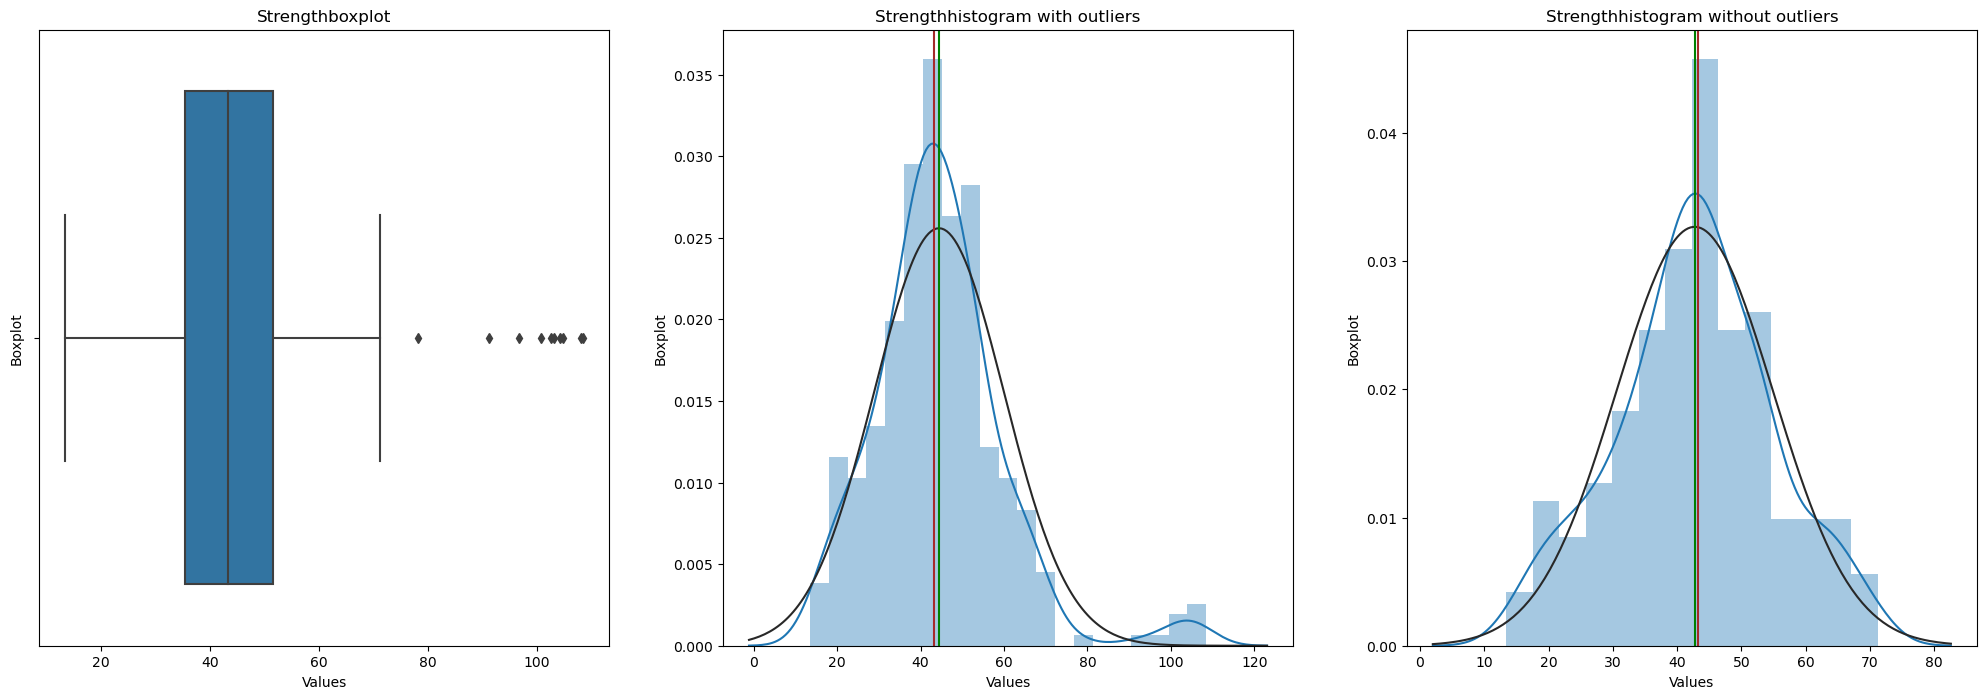

In [9]:
for col in df.columns:
    odt_plots(df,col)

Feature Strength does not have any outliers.




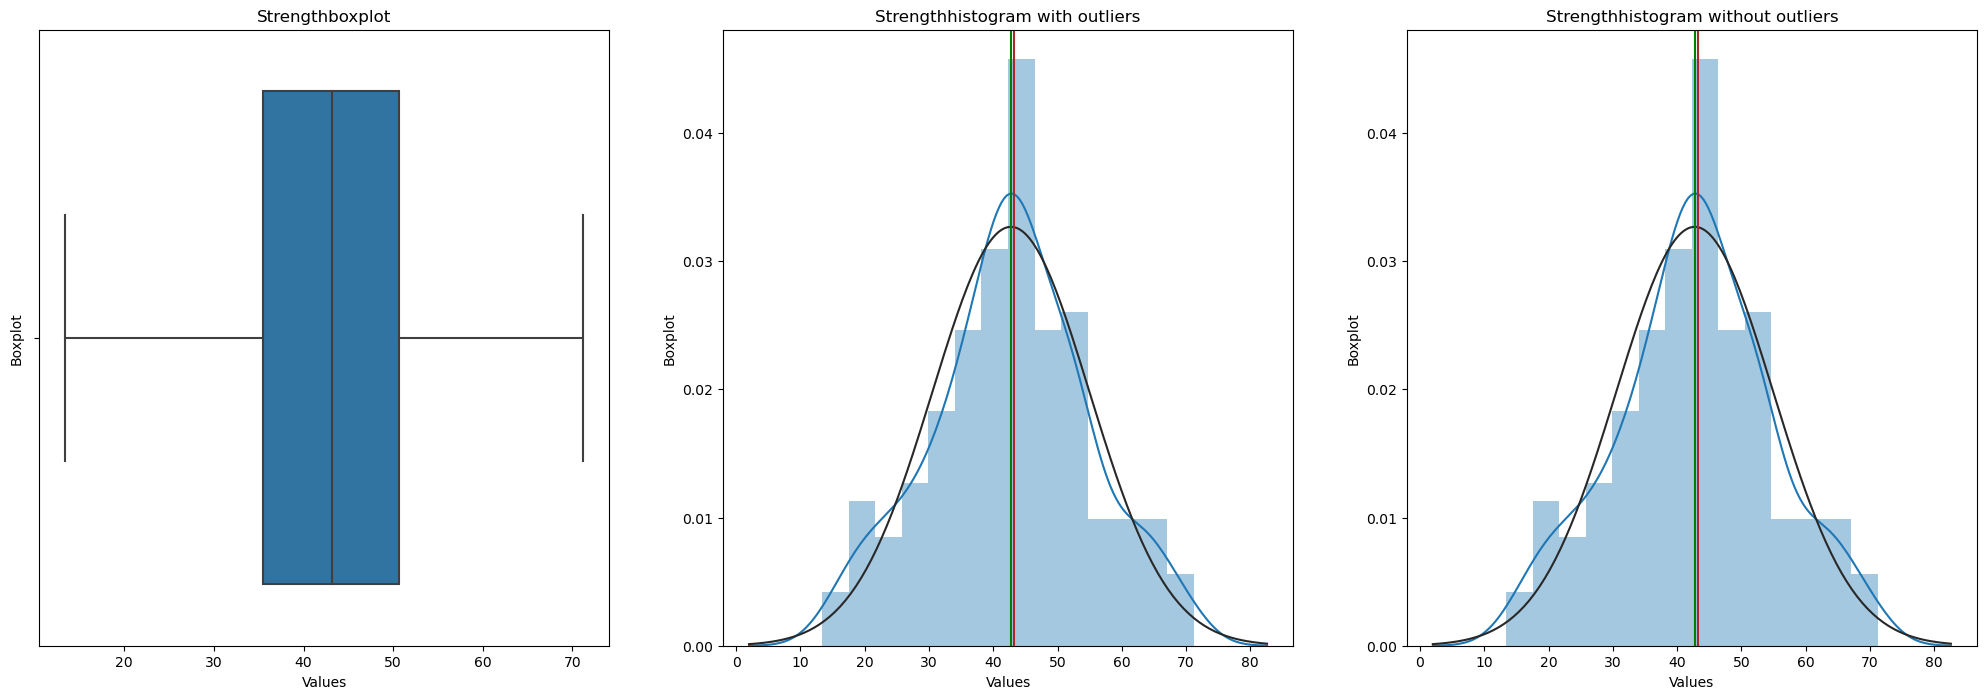

In [10]:
odt = odt_plots(df,col)
odt

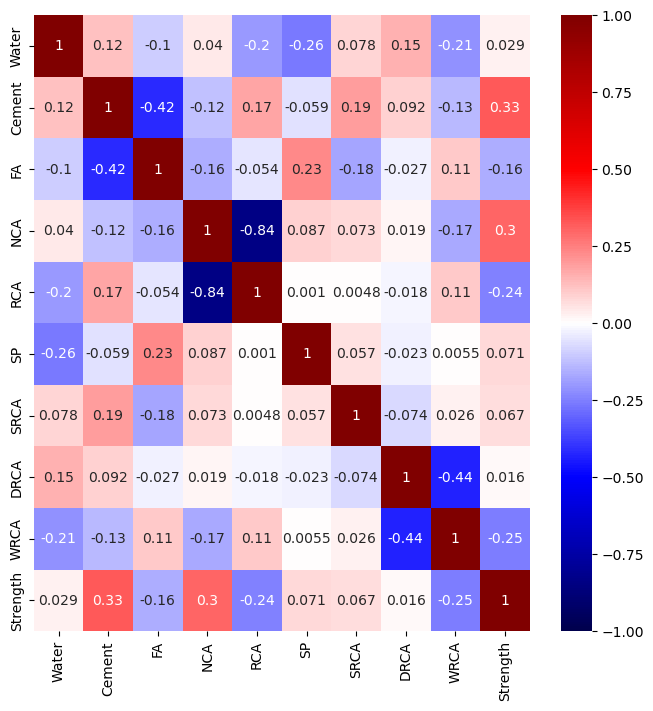

In [11]:
corr = df.corr()
df.ax = plt.subplots(figsize = (8,8))
sns.heatmap(corr,annot = True,center=0,vmax=1,vmin=-1,cmap='seismic')
plt.show()

In [12]:
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [13]:
vif_cal(input_data = df, dependent_col="Strength")

,Var,Vif
6,SRCA,1290.85
7,DRCA,1007.55
0,Water,69.96
2,FA,64.73
1,Cement,64.38
4,RCA,18.93
8,WRCA,18.57
3,NCA,10.65
5,SP,1.69


In [14]:
def custom_PCA(X):
    n_com = len(X.columns)
    
    for i in range(1,n_com):
        pca = PCA(n_components = i)
        p_comp = pca.fit_transform(X)
        evr = np.cumsum(pca.explained_variance_ratio_)      # evr = Explained Variance Ratio
        if evr[i-1] > 0.9:
            pcs = i
            break
    print('Explained Variance Ratio After PCA : ',evr)
    # Creating DataFrame of Principal Components
    col = []
    for j in range(1,pcs+1):
        col.append('PC'+ str(j))
    pca_df = pd.DataFrame(p_comp,columns = col)
    return pca_df

In [15]:
pca_df = custom_PCA(df.drop('Strength', axis=1))

Explained Variance Ratio After PCA :  [0.85714104 0.94197257]


In [16]:
pca_df.head()

,PC1,PC2
0,-521.732852,142.182154
1,-178.178314,140.323097
2,680.708029,135.675455
3,-521.192881,184.695720
4,-177.638344,182.836663


## STEP 4:- FEATURE SCALING

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
def custom_PCA(X):
    n_com = len(X.columns)
    
    sc = MinMaxScaler()
    X = sc.fit_transform(X)
    
    for i in range(1,n_com):
        pca = PCA(n_components = i)
        p_comp = pca.fit_transform(X)
        evr = np.cumsum(pca.explained_variance_ratio_)      # evr = Explained Variance Ratio
        if evr[i-1] > 0.9:
            pcs = i
            break
    print('Explained Variance Ratio After PCA : ',evr)
    # Creating DataFrame of Principal Components
    col = []
    for j in range(1,pcs+1):
        col.append('PC'+ str(j))
    pca_df = pd.DataFrame(p_comp,columns = col)
    return pca_df

In [19]:
pca_df = custom_PCA(df.drop('Strength', axis=1))

Explained Variance Ratio After PCA :  [0.2425805  0.45189509 0.64866901 0.76197123 0.85029683 0.91027751]


In [20]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.238097,0.320537,0.020198,-0.056953,0.145400,-0.156698
1,-0.185632,0.127526,0.094681,-0.079406,0.120924,-0.154197
2,-0.054468,-0.355001,0.280891,-0.135538,0.059732,-0.147946
3,-0.313830,0.242536,-0.043424,-0.243903,0.361851,-0.074047
4,-0.261365,0.049525,0.031060,-0.266356,0.337374,-0.071547


In [21]:
pca_df = pca_df.join(df['Strength'], how = 'left')

In [22]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,Strength
0,-0.238097,0.320537,0.020198,-0.056953,0.145400,-0.156698,50.6
1,-0.185632,0.127526,0.094681,-0.079406,0.120924,-0.154197,50.8
2,-0.054468,-0.355001,0.280891,-0.135538,0.059732,-0.147946,50.2
3,-0.313830,0.242536,-0.043424,-0.243903,0.361851,-0.074047,60.8
4,-0.261365,0.049525,0.031060,-0.266356,0.337374,-0.071547,61.2


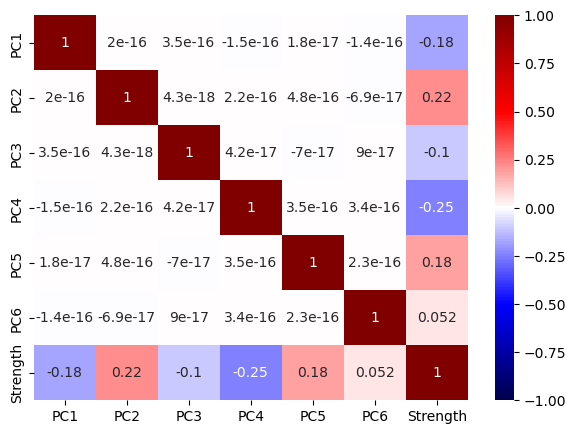

In [23]:
plt.subplots(figsize=(7,5))
sns.heatmap(pca_df.corr(),annot=True,cmap='seismic',center = 0,vmax = 1,vmin = -1);

In [24]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor

In [25]:
from sklearn.metrics import r2_score,mean_squared_error

In [26]:
def train_and_test_split(data, tcol, testSize=0.3, randomState=3):
    X = data.drop(tcol,axis=1)
    y = data[tcol]
    return train_test_split(X,y,test_size = testSize,random_state=randomState)

In [27]:
def model_builder(model_name, model, data, t_col):
    X_train,X_test,y_train,y_test = train_and_test_split(data,t_col)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    result = [model_name, rmse, r2]
    return result

In [28]:
model_builder(model_name='LinearRegression',model=LinearRegression(),data=pca_df,t_col='Strength')

['LinearRegression', 9.682561878367226, 0.22079305021024964]

In [29]:
def multiple_models(data, t_col):
    col_names=['Model Name','rmse','r2_score']
    result = pd.DataFrame(columns = col_names)
    result.loc[len(result)] = model_builder('Linear Regression',LinearRegression(),data,t_col)
    result.loc[len(result)] = model_builder('Lasso',Lasso(),data,t_col)
    result.loc[len(result)] = model_builder('Ridge',Ridge(),data,t_col)
    result.loc[len(result)] = model_builder('Decision Tree',DecisionTreeRegressor(),data,t_col)
    result.loc[len(result)] = model_builder('SVR',SVR(),data,t_col)
    result.loc[len(result)] = model_builder('KNN',KNeighborsRegressor(),data,t_col)
    result.loc[len(result)] = model_builder('Random Forest',RandomForestRegressor(),data,t_col)
    result.loc[len(result)] = model_builder('Gradient Boost',GradientBoostingRegressor(),data,t_col)
    result.loc[len(result)] = model_builder('ADA Boost',AdaBoostRegressor(),data,t_col)
    result.loc[len(result)] = model_builder('XG Boost',XGBRegressor(),data,t_col)
    return result.sort_values(by = 'r2_score', ascending=False)

In [30]:
multiple_models(pca_df, 'Strength').T

,6,7,8,5,4,2,0,9,1,3
Model Name,Random Forest,Gradient Boost,ADA Boost,KNN,SVR,Ridge,Linear Regression,XG Boost,Lasso,Decision Tree
rmse,8.12877,9.366761,9.389139,9.543422,9.618618,9.665652,9.682562,9.788698,10.968921,12.780804
r2_score,0.450811,0.270793,0.267304,0.243027,0.231051,0.223512,0.220793,0.203617,-0.0,-0.357652
